**Image reconstruction and classification**

In [6]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader,TensorDataset
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import style

In [13]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [7]:
data = pd.read_csv('mnist_train.csv')

In [8]:
#Transform to array and extract first 10k samples
data = np.array(data)
data = data[0:10000,:] # Extracting first 10000 samples
data.shape

(10000, 785)

In [9]:
#Remove labels
data = data[:,1:]

In [10]:
#Normalise the data, convert to torch tensor and reshape to 4D
dataN = data / np.max(data)
dataT = torch.tensor( dataN, dtype = torch.float32)
dataT = dataT.reshape(dataT.shape[0],1,28,28)
dataT.shape

torch.Size([10000, 1, 28, 28])

In [11]:
#The model
class AE_Model(nn.Module):
  def __init__(self):
    super().__init__()


    # Encoder Layers

    self.encconv  = nn.Conv2d(1, 10, 4, padding=1, stride=2)

    # Latent Layer

    self.latent  = nn.Conv2d(10, 20, 4, padding=1, stride=2)

    # Decoder Layers

    self.decconv = nn.ConvTranspose2d(20, 10, 4, padding=1,stride=2)

    # Output Layer

    self.out  = nn.ConvTranspose2d(10, 1, 4, padding=1,stride=2)


  def forward(self,x):

      #  encoder layer
      x = F.leaky_relu( self.encconv(x) )


      # latent layer
      x = F.leaky_relu( self.latent(x) )

      # decoder layer
      x = F.leaky_relu( self.decconv(x) )


      # Output layer
      x = torch.sigmoid( self.out(x) )

      return x


In [12]:
#Creating Instance and setting parameters
model = AE_Model()
lossfunc = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=.001)

In [14]:
#Train the model
epochs = 15001

losses = torch.zeros(epochs)

for epoch in range(epochs):

  # Selecting a batchsize  of 32.

  random_idx = np.random.choice(dataT.shape[0], size=32)

  X = dataT[random_idx,:]
  ypred = model(X)
  loss = lossfunc(ypred,X)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


  losses[epoch] = loss.item()

  if (epoch % 1000) == 0:

      print(f' epochs : {epoch}  loss : {loss : 2.2f}')

 epochs : 0  loss :  0.28
 epochs : 1000  loss :  0.00
 epochs : 2000  loss :  0.00
 epochs : 3000  loss :  0.00
 epochs : 4000  loss :  0.00
 epochs : 5000  loss :  0.00
 epochs : 6000  loss :  0.00
 epochs : 7000  loss :  0.00
 epochs : 8000  loss :  0.00
 epochs : 9000  loss :  0.00
 epochs : 10000  loss :  0.00
 epochs : 11000  loss :  0.00
 epochs : 12000  loss :  0.00
 epochs : 13000  loss :  0.00
 epochs : 14000  loss :  0.00
 epochs : 15000  loss :  0.00


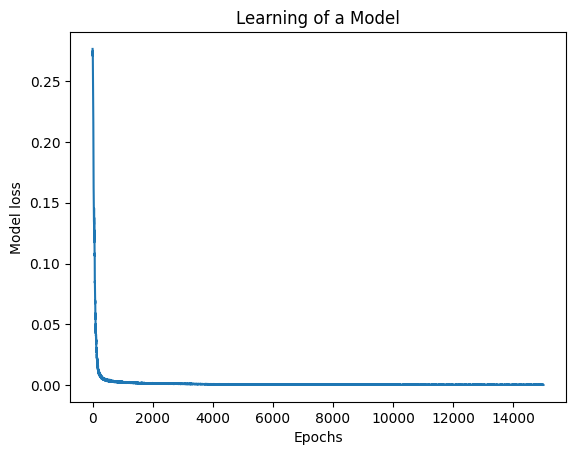

In [15]:
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Model loss')
plt.title('Learning of a Model')
plt.show()

In [18]:
#Model Testing
X = dataT[:10,:]  # Extracting first 10 samples
ypred = model(X)

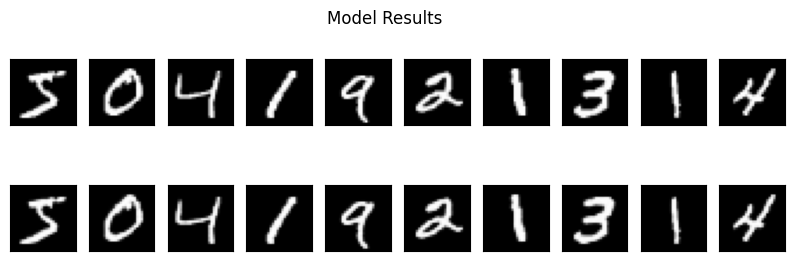

In [19]:
fig,axes = plt.subplots(2,10,figsize=(10,3))

for i in range(10):
  axes[0,i].imshow(X[i,:].view(28,28).detach() ,cmap='gray')
  axes[1,i].imshow(ypred[i,:].view(28,28).detach() ,cmap='gray')
  axes[0,i].set_xticks([]), axes[0,i].set_yticks([])
  axes[1,i].set_xticks([]), axes[1,i].set_yticks([])

plt.suptitle('Model Results')
plt.show()